## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "D:\\Repos1\\gwu-arl-data-pt-09-2020-u-c\\02-Homework\\05-Matplotlib\\01-Case-Assignment\\Instructions\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "D:\\Repos1\\gwu-arl-data-pt-09-2020-u-c\\02-Homework\\05-Matplotlib\\01-Case-Assignment\\Instructions\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_combo = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
pyma_combo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = pyma_combo['Mouse ID'].count()
mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = pyma_combo[pyma_combo.duplicated(['Mouse ID', 'Timepoint'])]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pyma_combo = pyma_combo.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
pyma_unique = pd.DataFrame(pyma_combo)
pyma_unique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
pyma_unique['Mouse ID'].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

t_mean = pyma_unique['Tumor Volume (mm3)'].describe()['mean']
t_median = pyma_unique['Tumor Volume (mm3)'].median()
t_var = pyma_unique['Tumor Volume (mm3)'].var()
t_std = pyma_unique['Tumor Volume (mm3)'].describe()['std']
t_sem = pyma_unique['Tumor Volume (mm3)'].sem()

t_summary =  pd.DataFrame({'Tumor Vol Mean': [t_mean], 'Tumor Vol Median': [t_median], 'Tumor Vol Variance': [t_var], \
                          'Tumor Vol Std Dev': [t_std], 'Tumor Vol Std Error': [t_sem]})
t_summary

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol Std Error
0,50.449276,48.951421,79.291277,8.904565,0.204933


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


props['Mean'] = pyma_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
props['Std Dev'] = pyma_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
props['Median'] = pyma_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
props['Std Error'] = pyma_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
props['Variance'] = pyma_unique.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

props = props[['Mean', 'Median', 'Variance', 'Std Dev', 'Std Error']]
props

,Mean,Median,Variance,Std Dev,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#aggregate = pd.DataFrame(pyma_unique[['Drug Regimen','Tumor Volume (mm3)']])

aggregate = pyma_unique.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

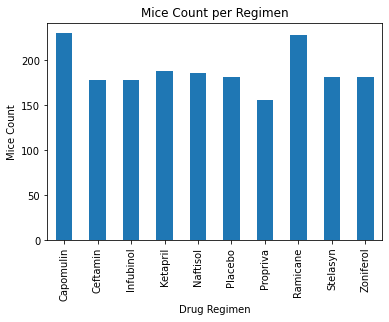

<Figure size 432x288 with 0 Axes>

In [132]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
cleaned = pyma_unique.loc[pyma_unique['Drug Regimen'] != '\n']
#cleaned = cleaned.groupby('Drug Regimen')
mice = cleaned.groupby('Drug Regimen')
micecount = mice['Mouse ID'].count()
#mice = pd.DataFrame(mice)
#mice.reset_index(inplace=True)
#mice.columns = ['Drug Regimen','count']
#mice.rename(columns={'count','Tested Mice Count'}, inplace = True)
#mice.reset_index(inplace=True) 
#mice.dtypes
micecount 
#y_axis = mice['count']
#x_axis = mice['Drug Regimen']

mice_chart = micecount.plot(kind='bar', title = 'No. of Mice Tested per Regimen')
mice_chart.set_xlabel("Drug Regimen")
mice_chart.set_ylabel('Mice Count')
plt.show()
plt.tight_layout()

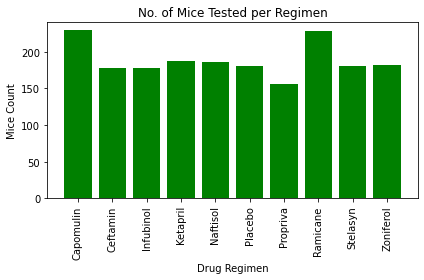

In [131]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#micecount.reset_index(inplace=True) 

count = mice.count()
count.reset_index(inplace=True) 
plt.bar(count['Drug Regimen'], count['Mouse ID'], color ='g')
plt.xticks(rotation='vertical')

# Set x and y limits
#plt.xlim(0, len(x_axis))
plt.ylim(0, max(count["Mouse ID"])+10)

# Set a Title and labels
plt.title("No. of Mice Tested per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

plt.tight_layout()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
